In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import forward_modeling, model_trainer

# Comparing Performance to Forward Modeling

__Author:__ Sebastian Wagner-Carena

__Created:__ 04/01/2020

__Last Run:__ 04/01/2020

__Goals:__ Compare the performance of the BNN model to a forward modeling approach

## Forward Modeling

In [2]:
root_path = '/Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/'
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

def recursive_str_checker(cfg_dict):
    for key in cfg_dict:
        if isinstance(cfg_dict[key],str):
            cfg_dict[key] = cfg_dict[key].replace('/home/swagnercarena/ovejero/',root_path)
        if isinstance(cfg_dict[key],dict):
            recursive_str_checker(cfg_dict[key])
recursive_str_checker(cfg)

fow_model = forward_modeling.ForwardModel(cfg)

Is model built: True
No weights found. Saving new weights to /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1.h5


True image without noise.


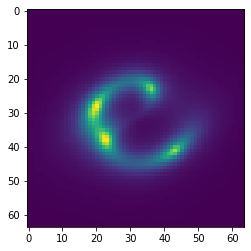

True image with noise.


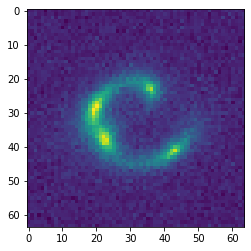

Image data
{'external_shear_dec_0': -0.04254594579306117, 'external_shear_gamma_ext': 0.05621896938274424, 'external_shear_psi_ext': -0.2187388114473809, 'external_shear_ra_0': 0.04447464276155878, 'img_filename': 'X_0000040.npy', 'lens_mass_center_x': 0.04447464276155878, 'lens_mass_center_y': -0.04254594579306117, 'lens_mass_e1': -0.0019344217722709546, 'lens_mass_e2': -0.21863827627112475, 'lens_mass_gamma': 1.7476866515467957, 'lens_mass_theta_E': 0.9779771511036928, 'src_light_R_sersic': 0.5168324861130238, 'src_light_center_x': 0.0666606974830339, 'src_light_center_y': 0.06062729637749242, 'src_light_e1': 0.2586586502764554, 'src_light_e2': -0.2979420316652591, 'src_light_magnitude': 23.24981091894046, 'src_light_n_sersic': 2.4246063799468183, 'total_magnification': 10.755380317147083}


In [3]:
# Select the image we want to forward model.
image_index = 40
fow_model.select_image(image_index)

In [4]:
# Initialize our sampler
n_walkers = 50
save_path_chains = '/Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/forward_modeling/%s.h5'%(
    fow_model.image_dict['img_filename'])
fow_model.initialize_sampler(n_walkers,save_path_chains)

No chains found at /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/forward_modeling/X_0000040.npy.h5
Optimizing the following parameters:
['external_shear_gamma_ext', 'external_shear_psi_ext', 'lens_mass_center_x', 'lens_mass_center_y', 'lens_mass_e1', 'lens_mass_e2', 'lens_mass_gamma', 'lens_mass_theta_E', 'src_light_R_sersic', 'src_light_center_x', 'src_light_center_y', 'src_light_e1', 'src_light_e2', 'src_light_magnitude', 'src_light_n_sersic']


In [20]:
# And run the sampler
n_samps = 1000
fow_model.run_sampler(n_samps)

/opt/anaconda3/lib/python3.7/site-packages/lenstronomy/SimulationAPI/observation_api.py:185: UserWarning: read noise is specified but not used for noise properties. background noise is estimated from "background_noise" argument
  warnings.warn('read noise is specified but not used for noise properties. background noise is estimated'


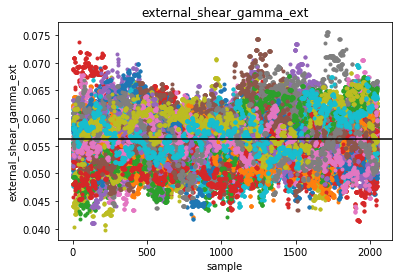

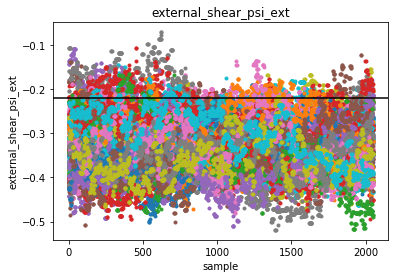

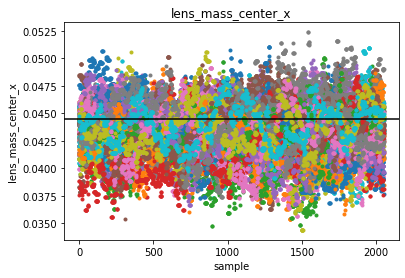

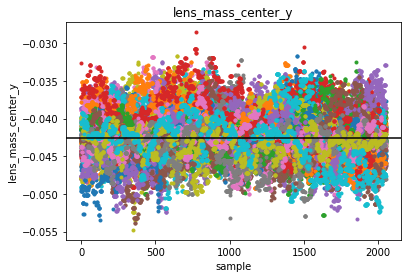

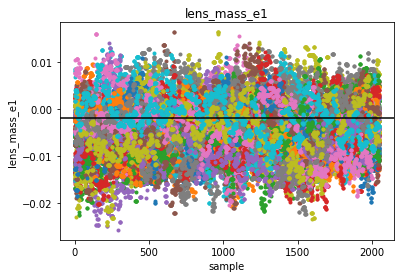

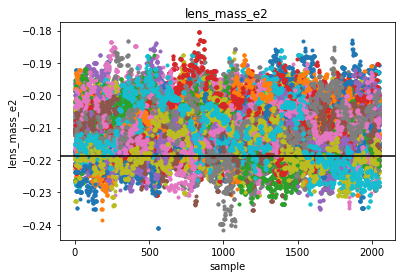

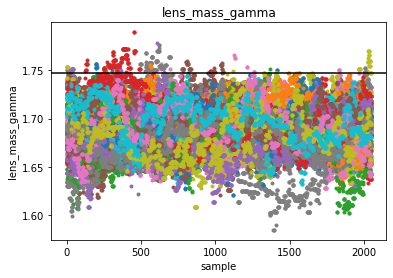

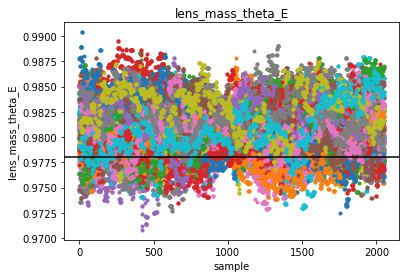

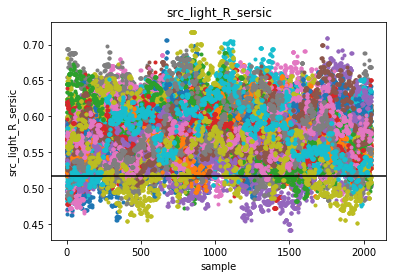

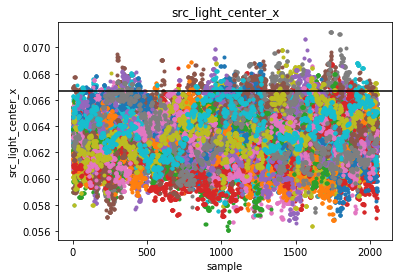

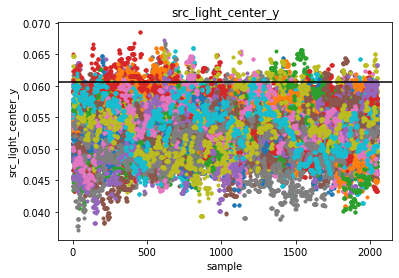

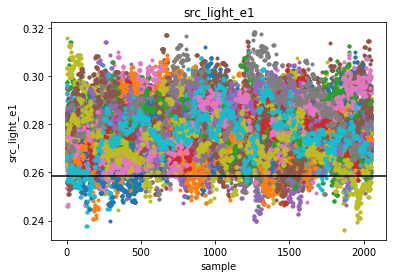

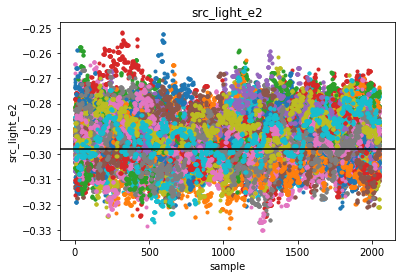

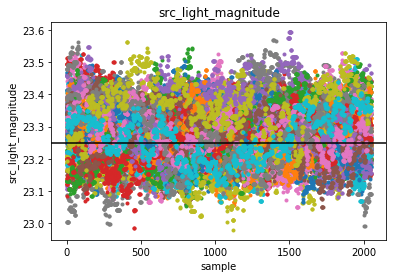

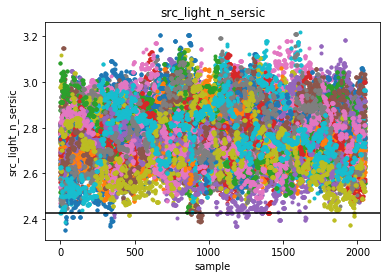

In [30]:
# Let's take a look at the chains to make sure they seem converged
burnin = 1000
fow_model.plot_chains(burnin)

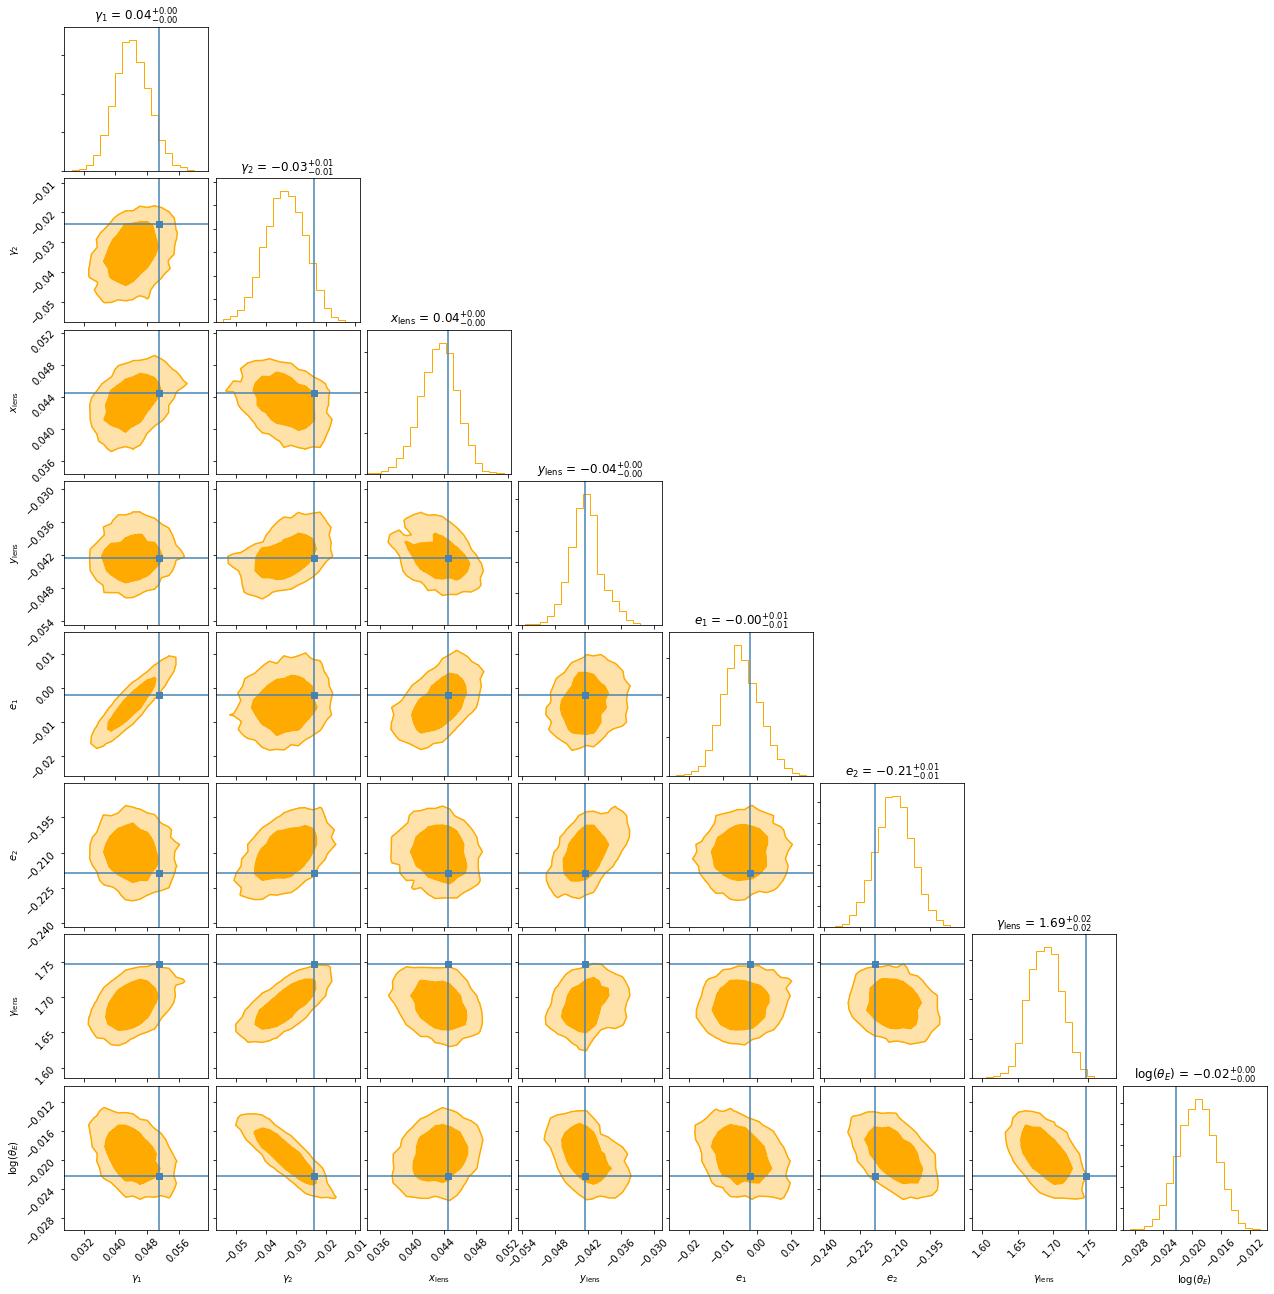

In [31]:
# Now let's look at the corner plot of the parameters we care about (the lens parameters)
num_samples = 1000
fow_model.plot_posterior_contours(burnin,num_samples)